# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [38]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + "New York")
jsondata = response.json()
print(jsondata)

{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 15.59, 'pressure': 1020, 'humidity': 51, 'temp_min': 13.89, 'temp_max': 17.22}, 'visibility': 16093, 'wind': {'speed': 1.947, 'deg': 34}, 'clouds': {'all': 1}, 'dt': 1570981992, 'sys': {'type': 1, 'id': 4686, 'country': 'US', 'sunrise': 1570964671, 'sunset': 1571005179}, 'timezone': -14400, 'id': 5128581, 'name': 'New York', 'cod': 200}


In [39]:
jsondata["coord"]["lat"]

40.73

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
data = []
i = 0
for city in cities:
    json = requests.get(query_url + city).json()
    i = i+1
    try:
        tempmax=json["main"]['temp_max']
        humidity=json["main"]["humidity"]
        speed=json['wind']["speed"]
        cloudiness=json["clouds"]["all"]
        lat=json["coord"]["lat"]
        country=json['sys']["country"]
        date=json['dt']
        lon=json["coord"]["lon"]
        data.append([city,cloudiness,country,date,humidity,lat,lon,tempmax,speed])
        print(f"counter {i} || {city}")
        time.sleep(.1)
    except:
        print("city not found")



counter 1 || nikolskoye
counter 2 || provideniya
counter 3 || namibe
counter 4 || busselton
counter 5 || castro
counter 6 || georgetown
counter 7 || rikitea
counter 8 || kaitangata
counter 9 || kapaa
counter 10 || hithadhoo
counter 11 || punta arenas
counter 12 || doka
counter 13 || evensk
counter 14 || narsaq
counter 15 || avarua
counter 16 || la ronge
counter 17 || riviere-au-renard
counter 18 || palmer
counter 19 || jiazi
counter 20 || cape town
counter 21 || yenagoa
city not found
counter 23 || jamestown
counter 24 || salalah
city not found
counter 26 || atuona
counter 27 || santa maria del oro
counter 28 || hualmay
counter 29 || barrow
counter 30 || kajaani
counter 31 || puerto ayora
counter 32 || vao
counter 33 || ippy
counter 34 || sao joao da barra
counter 35 || hilo
counter 36 || ancud
counter 37 || qaanaaq
counter 38 || fort nelson
counter 39 || muncar
counter 40 || kakonko
counter 41 || tautira
city not found
counter 43 || watertown
city not found
counter 45 || hobart
city n

city not found
city not found
counter 356 || kanata
counter 357 || esperance
counter 358 || harper
counter 359 || muros
counter 360 || zeya
counter 361 || aksu
counter 362 || plettenberg bay
counter 363 || suntar
counter 364 || robat karim
counter 365 || grand-lahou
counter 366 || altay
counter 367 || atambua
city not found
counter 369 || dingle
counter 370 || pirot
counter 371 || marsa matruh
counter 372 || nizwa
counter 373 || torrevieja
counter 374 || bemidji
city not found
counter 376 || cartagena
counter 377 || bandarbeyla
counter 378 || ulundi
counter 379 || asyut
counter 380 || port hedland
counter 381 || mogapinyana
counter 382 || buchanan
counter 383 || amazar
counter 384 || barabinsk
counter 385 || belaya gora
counter 386 || zaragoza
counter 387 || katsuura
counter 388 || tomatlan
counter 389 || novyy urengoy
counter 390 || wanning
counter 391 || isangel
counter 392 || hofn
city not found
counter 394 || ouegoa
counter 395 || faanui
counter 396 || balkanabat
counter 397 || hua

In [42]:
df = pd.DataFrame(data,columns=["City","Cloudiness","Country", "Date","Humidity","Lat","Lng","Max Temp","Wind Speed"])
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nikolskoye,75,RU,1570982256,76,59.70,30.79,11.00,7.000
1,provideniya,81,RU,1570982256,83,64.42,-173.23,-2.13,2.553
2,namibe,49,AO,1570982257,83,-15.19,12.15,22.11,3.494
3,busselton,94,AU,1570982257,67,-33.64,115.35,13.33,4.745
4,castro,0,CL,1570982257,57,-42.48,-73.76,10.00,7.200


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [43]:
date=time.strftime("%d%m%y")
date

'131019'

Text(0.5, 0, 'Latitude')

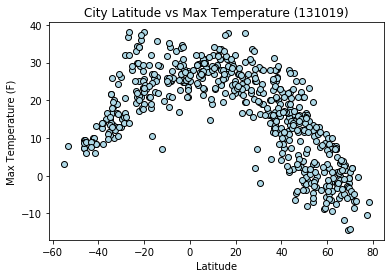

In [44]:
plt.scatter(df["Lat"], df["Max Temp"], color="lightblue", edgecolor="black")
plt.title(f"City Latitude vs Max Temperature ({date})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#### Latitude vs. Humidity Plot

Text(0.5, 0, 'Latitude')

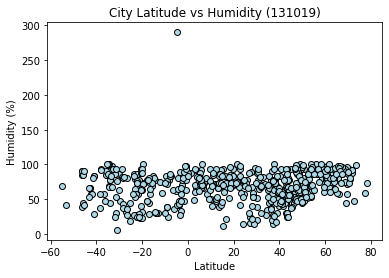

In [45]:
plt.scatter(df["Lat"], df["Humidity"], color="lightblue", edgecolor="black")
plt.title(f"City Latitude vs Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

#### Latitude vs. Cloudiness Plot

Text(0.5, 0, 'Latitude')

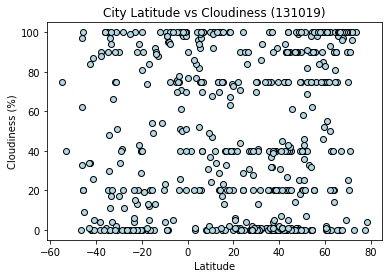

In [46]:
plt.scatter(df["Lat"], df["Cloudiness"], color="lightblue", edgecolor="black")
plt.title(f"City Latitude vs Cloudiness ({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

#### Latitude vs. Wind Speed Plot

Text(0.5, 0, 'Latitude')

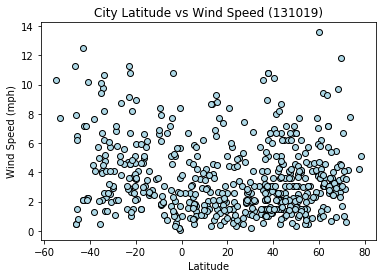

In [47]:
plt.scatter(df["Lat"], df["Wind Speed"], color="lightblue", edgecolor="black")
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")